# Workflows
To demonstrate the workflows implemented in the `atomistics` package, the [LAMMPS](https://www.lammps.org/) molecular 
dynamics simulation code is used in the following demonstrations. Still the same `workflows` can also be used with other
simulation codes:

In [1]:
from atomistics.calculators import evaluate_with_lammps, get_potential_by_name

potential_dataframe = get_potential_by_name(
    potential_name='1999--Mishin-Y--Al--LAMMPS--ipr1'
)
result_dict = evaluate_with_lammps(
    task_dict={},
    potential_dataframe=potential_dataframe,
)

/Users/jan/projects/atomistics/atomistics/calculators/lammps/potential.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst


The interatomic potential for Aluminium from Mishin named `1999--Mishin-Y--Al--LAMMPS--ipr1` is used in the evaluation
with [LAMMPS](https://www.lammps.org/) `evaluate_with_lammps()`. 

## Elastic Matrix 
The elastic constants and elastic moduli can be calculated using the `ElasticMatrixWorkflow`: 

In [2]:
from ase.build import bulk
from atomistics.calculators import evaluate_with_lammps, get_potential_by_name
from atomistics.workflows import ElasticMatrixWorkflow

potential_dataframe = get_potential_by_name(
    potential_name='1999--Mishin-Y--Al--LAMMPS--ipr1'
)
workflow = ElasticMatrixWorkflow(
    structure=bulk("Al", cubic=True), 
    num_of_point=5, 
    eps_range=0.005, 
    sqrt_eta=True, 
    fit_order=2,
)
task_dict = workflow.generate_structures()
result_dict = evaluate_with_lammps(
    task_dict=task_dict,
    potential_dataframe=potential_dataframe,
)
fit_dict = workflow.analyse_structures(output_dict=result_dict)
print(fit_dict)

/Users/jan/projects/atomistics/atomistics/calculators/lammps/potential.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/Users/jan/miniforge3/lib/python3.11/site-packages/pylammpsmpi/wrapper/ase.py:165: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(


OrderedDict([('SGN', 225), ('v0', 66.43012500000002), ('LC', 'CI'), ('Lag_strain_list', ['01', '08', '23']), ('epss', array([-0.005 , -0.0025,  0.    ,  0.0025,  0.005 ])), ('e0', -13.439999952539933), ('strain_energy', [[(-0.005, -13.436318571477456), (-0.0025, -13.439078837682322), (0.0, -13.439999952539933), (0.0024999999999999996, -13.439085818358748), (0.005, -13.436366000141689)], [(-0.005, -13.438173590018806), (-0.0025, -13.43954407461901), (0.0, -13.439999952539933), (0.0024999999999999996, -13.439548790708864), (0.005, -13.438205313732144)], [(-0.005, -13.436741916886653), (-0.0025, -13.439195456175232), (0.0, -13.439999952539933), (0.0024999999999999996, -13.439213481749942), (0.005, -13.436885676373926)]]), ('C', array([[114.10393023,  60.51098897,  60.51098897,   0.        ,
          0.        ,   0.        ],
       [ 60.51098897, 114.10393023,  60.51098897,   0.        ,
          0.        ,   0.        ],
       [ 60.51098897,  60.51098897, 114.10393023,   0.        ,

The `ElasticMatrixWorkflow` takes an `ase.atoms.Atoms` object as `structure` input as well as the number of points 
`num_of_point` for each compression direction. Depending on the symmetry of the input `structure` the number of 
calculations required to calculate the elastic matrix changes. The compression and elongation range is defined by the
`eps_range` parameter. Furthermore, `sqrt_eta` and `fit_order` describe how the change in energy over compression and
elongation is fitted to calculate the resulting pressure. 

## Energy Volume Curve
The `EnergyVolumeCurveWorkflow` can be used to calculate the equilibrium properties: equilibrium volume, equilibrium 
energy, equilibrium bulk modulus and the pressure derivative of the equilibrium bulk modulus. 

In [3]:
from ase.build import bulk
from atomistics.calculators import evaluate_with_lammps, get_potential_by_name
from atomistics.workflows import EnergyVolumeCurveWorkflow

potential_dataframe = get_potential_by_name(
    potential_name='1999--Mishin-Y--Al--LAMMPS--ipr1'
)
workflow = EnergyVolumeCurveWorkflow(
    structure=bulk("Al", cubic=True), 
    num_points=11,
    fit_type="polynomial",
    fit_order=3,
    vol_range=0.05,
    axes=("x", "y", "z"),
    strains=None,
)
task_dict = workflow.generate_structures()
result_dict = evaluate_with_lammps(
    task_dict=task_dict,
    potential_dataframe=potential_dataframe,
)
fit_dict = workflow.analyse_structures(output_dict=result_dict)
print(fit_dict)

/Users/jan/projects/atomistics/atomistics/calculators/lammps/potential.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/Users/jan/miniforge3/lib/python3.11/site-packages/pylammpsmpi/wrapper/ase.py:165: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(


{'poly_fit': array([-4.17645808e-05,  1.19746500e-02, -1.03803906e+00,  1.49168639e+01]), 'fit_type': 'polynomial', 'fit_order': 3, 'volume_eq': 66.43019853103964, 'energy_eq': -13.43996804374383, 'bulkmodul_eq': 77.7250135953191, 'b_prime_eq': 1.279502459079921, 'least_square_error': 3.225313797039607e-10, 'volume': [63.10861874999998, 63.77291999999998, 64.43722124999998, 65.1015225, 65.76582375000004, 66.43012500000002, 67.09442624999994, 67.75872750000002, 68.42302874999999, 69.08732999999997, 69.75163125000002], 'energy': [-13.398169481534445, -13.413389552957456, -13.425112589013958, -13.433411420804067, -13.438357630783006, -13.439999952539933, -13.438383476946305, -13.433607982916406, -13.425774537190858, -13.414961805921427, -13.401233093668836]}


The input parameters for the `EnergyVolumeCurveWorkflow` in addition to the `ase.atoms.Atoms` object defined 
as `structure` are: 

* `num_points` the number of strains to calculate energies and volumes.  
* `fit_type` the type of the fit which should be used to calculate the equilibrium properties. This can either be a 
  `polynomial` fit or a specific equation of state like the Birch equation (`birch`), the Birch-Murnaghan equation 
  (`birchmurnaghan`) the Murnaghan equation (`murnaghan`), the Pourier Tarnatola eqaution (`pouriertarantola`) or the
  Vinet equation (`vinet`).  
* `fit_order` for the `polynomial` fit type the order of the polynomial can be set, for the other fit types this 
  parameter is ignored. 
* `vol_range` specifies the amount of compression and elongation to be applied relative to the absolute volume. 
* `axes` specifies the axes which are compressed, typically a uniform compression is applied. 
* `strains` specifies the strains directly rather than deriving them from the range of volume compression `vol_range`. 

Beyond calculating the equilibrium properties the `EnergyVolumeCurveWorkflow` can also be used to calculate the thermal
expansion using the [Moruzzi, V. L. et al.](https://link.aps.org/doi/10.1103/PhysRevB.37.790)  model: 

In [4]:
temperatures, volumes = workflow.get_thermal_expansion(
    output_dict=result_dict, 
    t_min=1, 
    t_max=1500, 
    t_step=50, 
    temperatures=None,
)

The [Moruzzi, V. L. et al.](https://link.aps.org/doi/10.1103/PhysRevB.37.790)  model is a quantum mechanical approximation, so the equilibrium volume at 0K is not
the same as the equilibrium volume calculated by fitting the equation of state. 

## Molecular Dynamics 
Just like the structure optimization also the molecular dynamics calculation can either be implemented inside the
simulation code or in the `atomistics` package. The latter has the advantage that it is the same implementation for all
different simulation codes, while the prior has the advantage that it is usually faster and computationally more efficient.

### Implemented in Simulation Code 
One example of a molecular dynamics calculation with the LAMMPS simulation code is the calculation of the thermal 
expansion: 

In [5]:
from ase.build import bulk
from atomistics.calculators import (
    calc_molecular_dynamics_thermal_expansion_with_lammps, 
    evaluate_with_lammps, 
    get_potential_by_name,
)

potential_dataframe = get_potential_by_name(
    potential_name='1999--Mishin-Y--Al--LAMMPS--ipr1'
)
temperatures_md, volumes_md = calc_molecular_dynamics_thermal_expansion_with_lammps(
    structure=bulk("Al", cubic=True).repeat([10, 10, 10]),
    potential_dataframe=potential_dataframe,
    Tstart=15,
    Tstop=1500,
    Tstep=5,
    Tdamp=0.1,
    run=100,
    thermo=100,
    timestep=0.001,
    Pstart=0.0,
    Pstop=0.0,
    Pdamp=1.0,
    seed=4928459,
    dist="gaussian",
    lmp=None,
)

/Users/jan/projects/atomistics/atomistics/calculators/lammps/potential.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/Users/jan/miniforge3/lib/python3.11/site-packages/pylammpsmpi/wrapper/ase.py:165: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(


In addition to the typical LAMMPS input parameters like the atomistic structure `structure` as `ase.atoms.Atoms` object
and the `pandas.DataFrame` for the interatomic potential `potential_dataframe` are: 

* `Tstart` start temperature 
* `Tstop` end temperature 
* `Tstep` temperature step 
* `Tdamp` temperature damping parameter 
* `run` number of molecular dynamics steps to be executed during one temperature step
* `thermo` refresh rate for the thermo dynamic properties, this should typically be the same as the number of molecular
  dynamics steps. 
* `timestep` time step - typically 1fs defined as `0.001`.
* `Pstart` start pressure 
* `Pstop` end pressure 
* `Pdamp` pressure damping parameter 
* `seed` random seed for the molecular dynamics 
* `dist` initial velocity distribution 
* `lmp` Lammps library instance as `pylammpsmpi.LammpsASELibrary` object 

These input parameters are based on the LAMMPS fix `nvt/npt`, you can read more about the specific implementation on the
[LAMMPS website](https://docs.lammps.org/fix_nh.html). 


### Langevin Thermostat 
In addition to the molecular dynamics implemented in the LAMMPS simulation code, the `atomistics` package also provides
the `LangevinWorkflow` which implements molecular dynamics independent of the specific simulation code. 


In [6]:
from ase.build import bulk
from atomistics.calculators import evaluate_with_lammps_library, get_potential_by_name
from atomistics.workflows import LangevinWorkflow
from pylammpsmpi import LammpsASELibrary

steps = 300
potential_dataframe = get_potential_by_name(
    potential_name='1999--Mishin-Y--Al--LAMMPS--ipr1'
)
workflow = LangevinWorkflow(
    structure=bulk("Al", cubic=True).repeat([2, 2, 2]), 
    temperature=1000.0,
    overheat_fraction=2.0,
    damping_timescale=100.0,
    time_step=1,
)
lmp = LammpsASELibrary(
    working_directory=None,
    cores=1,
    comm=None,
    logger=None,
    log_file=None,
    library=None,
    diable_log_file=True,
)
eng_pot_lst, eng_kin_lst = [], []
for i in range(steps):
    task_dict = workflow.generate_structures()
    result_dict = evaluate_with_lammps_library(
        task_dict=task_dict,
        potential_dataframe=potential_dataframe,
        lmp=lmp,
    )
    eng_pot, eng_kin = workflow.analyse_structures(output_dict=result_dict)
    eng_pot_lst.append(eng_pot)
    eng_kin_lst.append(eng_kin)
lmp.close()

/Users/jan/projects/atomistics/atomistics/calculators/lammps/potential.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/Users/jan/miniforge3/lib/python3.11/site-packages/pylammpsmpi/wrapper/ase.py:165: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(


The advantage of this implementation is that the user can directly interact with the simulation between the individual
molecular dynamics simulation steps. This provides a lot of flexibility to prototype new simulation methods. The input
parameters of the `LangevinWorkflow` are:

* `structure` the `ase.atoms.Atoms` object which is used as initial structure for the molecular dynamics calculation 
* `temperature` the temperature of the molecular dynamics calculation given in Kelvin
* `overheat_fraction` the over heating fraction of the Langevin thermostat
* `damping_timescale` the damping timescale of the Langevin thermostat 
* `time_step` the time steps of the Langevin thermostat


## Harmonic Approximation 
The harmonic approximation is implemented in two variations, once with constant volume and once including the volume 
expansion at finite temperature also known as quasi-harmonic approximation. Both of these are based on the [phonopy](https://phonopy.github.io/phonopy/)
package. 

### Phonons 
To calculate the phonons at a fixed volume the `PhonopyWorkflow` is used:

In [7]:
from ase.build import bulk
from atomistics.calculators import evaluate_with_lammps, get_potential_by_name
from atomistics.workflows import PhonopyWorkflow
from phonopy.units import VaspToTHz

potential_dataframe = get_potential_by_name(
    potential_name='1999--Mishin-Y--Al--LAMMPS--ipr1'
)
workflow = PhonopyWorkflow(
    structure=bulk("Al", cubic=True), 
    interaction_range=10,
    factor=VaspToTHz,
    displacement=0.01,
    dos_mesh=20,
    primitive_matrix=None,
    number_of_snapshots=None,
)
task_dict = workflow.generate_structures()
result_dict = evaluate_with_lammps(
    task_dict=task_dict,
    potential_dataframe=potential_dataframe,
)
mesh_dict, dos_dict = workflow.analyse_structures(output_dict=result_dict)

/Users/jan/projects/atomistics/atomistics/calculators/lammps/potential.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/Users/jan/miniforge3/lib/python3.11/site-packages/pylammpsmpi/wrapper/ase.py:165: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(


The `PhonopyWorkflow` takes the following inputs: 

* `structure` the `ase.atoms.Atoms` object to calculate the phonon spectrum
* `interaction_range` the cutoff radius to consider for identifying the interaction between the atoms
* `factor` conversion factor, typically just `phonopy.units.VaspToTHz` 
* `displacement` displacement to calculate the forces 
* `dos_mesh` mesh for the density of states 
* `primitive_matrix` primitive matrix
* `number_of_snapshots` number of snapshots to calculate

In addition to the phonon properties, the `PhonopyWorkflow` also enables the calculation of thermal properties: 

In [8]:
tp_dict = workflow.get_thermal_properties(
    t_min=1, 
    t_max=1500, 
    t_step=50, 
    temperatures=None,
    cutoff_frequency=None,
    pretend_real=False,
    band_indices=None,
    is_projection=False,
)
print(tp_dict)

{'temperatures': array([1.000e+00, 5.100e+01, 1.010e+02, 1.510e+02, 2.010e+02, 2.510e+02,
       3.010e+02, 3.510e+02, 4.010e+02, 4.510e+02, 5.010e+02, 5.510e+02,
       6.010e+02, 6.510e+02, 7.010e+02, 7.510e+02, 8.010e+02, 8.510e+02,
       9.010e+02, 9.510e+02, 1.001e+03, 1.051e+03, 1.101e+03, 1.151e+03,
       1.201e+03, 1.251e+03, 1.301e+03, 1.351e+03, 1.401e+03, 1.451e+03,
       1.501e+03]), 'free_energy': array([ 0.14914132,  0.14837894,  0.13954171,  0.11738723,  0.08264779,
        0.03712237, -0.01759836, -0.08025513, -0.14986079, -0.22563203,
       -0.30693668, -0.39325592, -0.48415731, -0.57927552, -0.67829812,
       -0.78095507, -0.88701079, -0.99625805, -1.10851315, -1.22361223,
       -1.3414082 , -1.46176834, -1.58457228, -1.70971039, -1.8370824 ,
       -1.96659625, -2.09816715, -2.23171671, -2.3671723 , -2.5044664 ,
       -2.64353611]), 'entropy': array([1.10363972e-08, 5.98829810e+00, 2.96478195e+01, 5.54593816e+01,
       7.80099308e+01, 9.71787932e+01, 1.136085

The calculation of the thermal properties takes additional inputs: 

* `t_min` minimum temperature
* `t_max` maximum temperature
* `t_step` temperature step 
* `temperatures` alternative to `t_min`, `t_max` and `t_step` the array of temperatures can be defined directly
* `cutoff_frequency` cutoff frequency to exclude the contributions of frequencies below a certain cut off
* `pretend_real` use the absolute values of the phonon frequencies
* `band_indices` select bands based on their indices 
* `is_projection` multiplies the squared eigenvectors - not recommended

Furthermore, also the dynamical matrix can be directly calculated with the `PhonopyWorkflow`:


In [9]:
mat = workflow.get_dynamical_matrix()
mat

array(None, dtype=object)

Or alternatively the hesse matrix:

In [10]:
mat = workflow.get_hesse_matrix()
mat

array([[ 4.50127147e-02, -1.92714960e-33,  8.52306995e-33, ...,
        -6.63514216e-05,  8.82979633e-06,  5.93920137e-05],
       [-5.07378488e-34,  4.50127147e-02,  5.07378488e-34, ...,
         8.82979633e-06, -6.63514216e-05,  5.93920137e-05],
       [ 5.07378488e-34, -5.07378488e-34,  4.50127147e-02, ...,
         5.93659141e-05,  5.93659141e-05,  1.73512126e-05],
       ...,
       [-6.63514216e-05,  8.82979633e-06,  5.93920137e-05, ...,
         4.50127147e-02, -1.92714960e-33,  8.52306995e-33],
       [ 8.82979633e-06, -6.63514216e-05,  5.93920137e-05, ...,
        -5.07378488e-34,  4.50127147e-02,  5.07378488e-34],
       [ 5.93659141e-05,  5.93659141e-05,  1.73512126e-05, ...,
         5.07378488e-34, -5.07378488e-34,  4.50127147e-02]])

Finally, also the function to calculate the band structure is directly available on the `PhonopyWorkflow`: 

In [11]:
band_structure = workflow.get_band_structure(
    npoints=101, 
    with_eigenvectors=False, 
    with_group_velocities=False
)

This band structure can also be visualised using the built-in plotting function: 

<Axes: title={'center': 'Bandstructure'}, xlabel='Bandpath', ylabel='Frequency [THz]'>

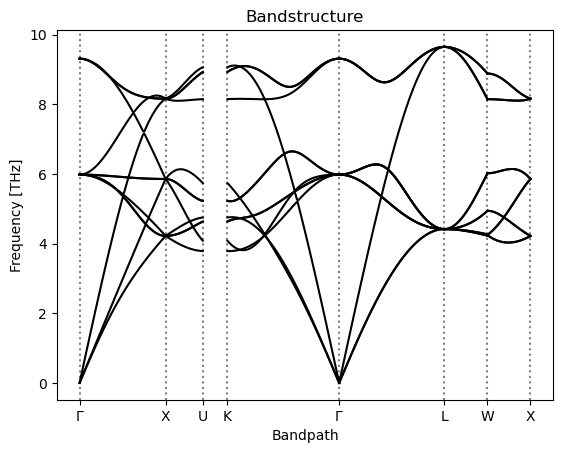

In [12]:
workflow.plot_band_structure()

Just like the desnsity of states which can be plotted using:

<Axes: title={'center': 'Phonon DOS vs Energy'}, xlabel='Frequency [THz]', ylabel='DOS'>

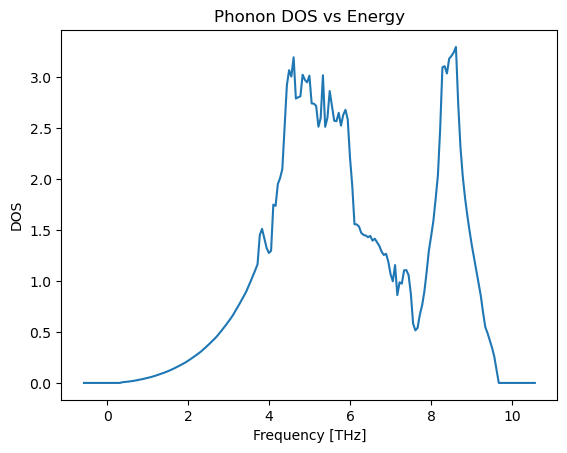

In [13]:
workflow.plot_dos()

### Quasi-harmonic Approximation 
To include the volume expansion with finite temperature the `atomistics` package implements the `QuasiHarmonicWorkflow`:

In [14]:
from ase.build import bulk
from atomistics.calculators import evaluate_with_lammps, get_potential_by_name
from atomistics.workflows import QuasiHarmonicWorkflow

potential_dataframe = get_potential_by_name(
    potential_name='1999--Mishin-Y--Al--LAMMPS--ipr1'
)
workflow = QuasiHarmonicWorkflow(
    structure=bulk("Al", cubic=True), 
    num_points=11,
    vol_range=0.05,
    interaction_range=10,
    factor=VaspToTHz,
    displacement=0.01,
    dos_mesh=20,
    primitive_matrix=None,
    number_of_snapshots=None,
)
task_dict = workflow.generate_structures()
result_dict = evaluate_with_lammps(
    task_dict=task_dict,
    potential_dataframe=potential_dataframe,
)
fit_dict = workflow.analyse_structures(output_dict=result_dict)

/Users/jan/projects/atomistics/atomistics/calculators/lammps/potential.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/Users/jan/miniforge3/lib/python3.11/site-packages/pylammpsmpi/wrapper/ase.py:165: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(


The `QuasiHarmonicWorkflow` is a combination of the `EnergyVolumeCurveWorkflow` and the `PhonopyWorkflow`. Consequently, 
the inputs are a superset of the inputs of these two workflows. 

Based on the `QuasiHarmonicWorkflow` the thermal expansion can be calculated:

In [15]:
temperatures, volumes = workflow.get_thermal_expansion(
    output_dict=result_dict, 
    t_min=1, 
    t_max=1500, 
    t_step=50, 
    temperatures=None,
    cutoff_frequency=None,
    pretend_real=False,
    band_indices=None,
    is_projection=False,
    quantum_mechanical=True,
)

This requires the same inputs as the calculation of the thermal properties `get_thermal_properties()` with the 
`PhonopyWorkflow`. The additional parameter `quantum_mechanical` specifies whether the classical harmonic oscillator or 
the quantum mechanical harmonic oscillator is used to calculate the free energy. 

## Structure Optimization 
In analogy to the molecular dynamics calculation also the structure optimization could in principle be defined inside 
the simulation code or on the python level. Still currently the `atomistics` package only supports the structure 
optimization defined inside the simulation codes. 

### Volume and Positions 
To optimize both the volume of the supercell as well as the positions inside the supercell the `atomistics` package
implements the `optimize_positions_and_volume()` workflow:

In [16]:
from ase.build import bulk
from atomistics.calculators import evaluate_with_lammps, get_potential_by_name
from atomistics.workflows import optimize_positions_and_volume

structure = bulk("Al", a=4.0, cubic=True)
potential_dataframe = get_potential_by_name(
    potential_name='1999--Mishin-Y--Al--LAMMPS--ipr1'
)
result_dict = evaluate_with_lammps(
    task_dict=optimize_positions_and_volume(structure=structure),
    potential_dataframe=potential_dataframe,
)
structure_opt = result_dict["structure_with_optimized_positions_and_volume"]
structure_opt

/Users/jan/projects/atomistics/atomistics/calculators/lammps/potential.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/Users/jan/miniforge3/lib/python3.11/site-packages/pylammpsmpi/wrapper/ase.py:165: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(


Atoms(symbols='Al4', pbc=True, cell=[[4.05000466219724, 2.4799126230458533e-16, 2.4799126230458533e-16], [0.0, 4.05000466219724, 2.4799126230458533e-16], [0.0, 0.0, 4.05000466219724]])

The result is the optimized atomistic structure as part of the result dictionary. 

### Positions 
The optimization of the positions inside the supercell without the optimization of the supercell volume is possible with
the `optimize_positions()` workflow:

In [17]:
from ase.build import bulk
from atomistics.calculators import evaluate_with_lammps, get_potential_by_name
from atomistics.workflows import optimize_positions

structure = bulk("Al", a=4.0, cubic=True)
potential_dataframe = get_potential_by_name(
    potential_name='1999--Mishin-Y--Al--LAMMPS--ipr1'
)
result_dict = evaluate_with_lammps(
    task_dict=optimize_positions(structure=structure),
    potential_dataframe=potential_dataframe,
)
structure_opt = result_dict["structure_with_optimized_positions"]
structure_opt

/Users/jan/projects/atomistics/atomistics/calculators/lammps/potential.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/Users/jan/miniforge3/lib/python3.11/site-packages/pylammpsmpi/wrapper/ase.py:165: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  warnings.warn(


Atoms(symbols='Al4', pbc=True, cell=[4.0, 4.0, 4.0])

The result is the optimized atomistic structure as part of the result dictionary. 